# Phân tích Dữ liệu Bán lẻ Trực tuyến (EDA)
Notebook này thực hiện phân tích khám phá dữ liệu (EDA) trên tập dữ liệu bán lẻ trực tuyến từ file CSV. Chúng ta sẽ kiểm tra dữ liệu, xử lý giá trị thiếu, thực hiện phân tích thống kê và trực quan hóa để hiểu rõ hơn về xu hướng bán hàng, khách hàng, và sản phẩm.

## 1. Nhập các thư viện cần thiết

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## 2. Đọc và kiểm tra dữ liệu

In [15]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('online_retail.csv', encoding='latin1')

# Xem trước 5 dòng đầu
print('=== Xem trước 5 dòng đầu ===')
print(df.head())

# Kiểm tra thông tin dữ liệu
print('\n=== Thông tin dữ liệu ===')
print(df.info())

# Kiểm tra giá trị thiếu
print('\n=== Giá trị thiếu ===')
print(df.isnull().sum())

=== Xem trước 5 dòng đầu ===
  ï»¿InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

=== Thông tin dữ liệu ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null C

## 3. Xử lý giá trị thiếu

In [16]:
# Loại bỏ các dòng có CustomerID thiếu
df = df.dropna(subset=['CustomerID'])

# Kiểm tra lại giá trị thiếu
print('=== Giá trị thiếu sau khi xử lý ===')
print(df.isnull().sum())

=== Giá trị thiếu sau khi xử lý ===
ï»¿InvoiceNo    0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
dtype: int64


## 4. Chuyển đổi kiểu dữ liệu và làm sạch dữ liệu

In [17]:
# Chuyển đổi kiểu dữ liệu
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

# Kiểm tra giá trị âm trong Quantity và UnitPrice
print('=== Số dòng với Quantity âm ===')
print(len(df[df['Quantity'] < 0]))
print('\n=== Số dòng với UnitPrice âm hoặc bằng 0 ===')
print(len(df[df['UnitPrice'] <= 0]))

# Loại bỏ các giao dịch với Quantity hoặc UnitPrice âm/0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Tạo cột TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

=== Số dòng với Quantity âm ===
8905

=== Số dòng với UnitPrice âm hoặc bằng 0 ===
40


## 5. Phân tích thống kê cơ bản

In [18]:
# Thống kê mô tả
print('=== Thống kê mô tả ===')
print(df.describe())

=== Thống kê mô tả ===
            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID     TotalPrice  
count  397884.000000  397884.000000  
mean    15294.423453      22.397000  
min     12346.000000       0.001000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.141560     309.071041  


## 6. Phân tích theo thời gian

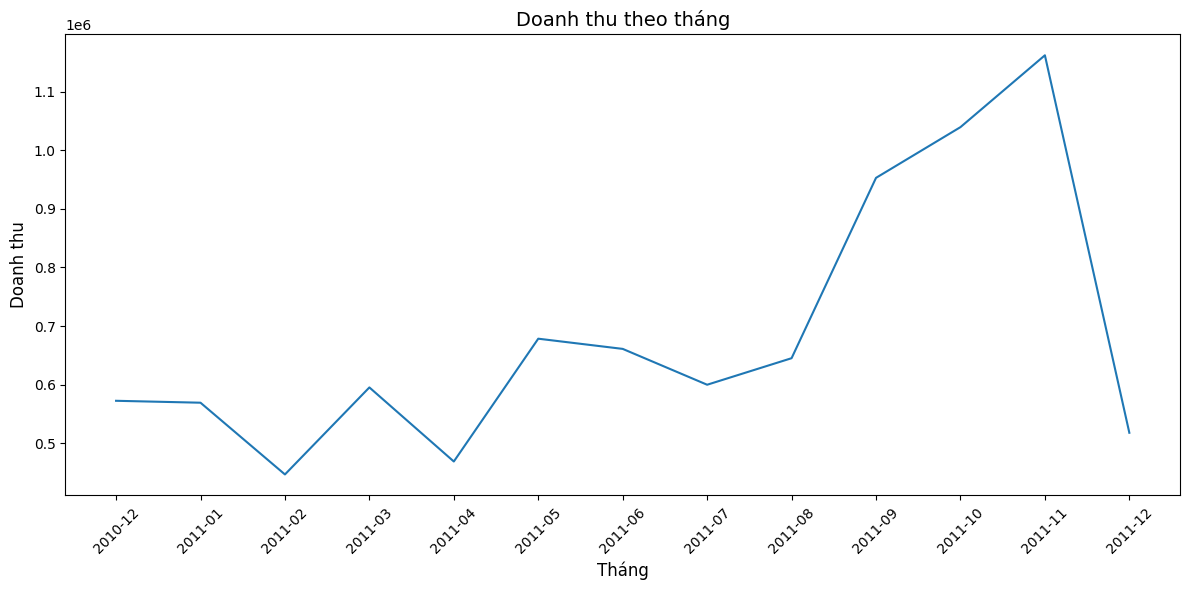

In [19]:
# Trích xuất năm, tháng, ngày, giờ từ InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

# Doanh thu theo tháng
monthly_revenue = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)

# Vẽ biểu đồ doanh thu theo tháng
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_revenue)
plt.title('Doanh thu theo tháng', fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Phân tích số lượng giao dịch theo giờ

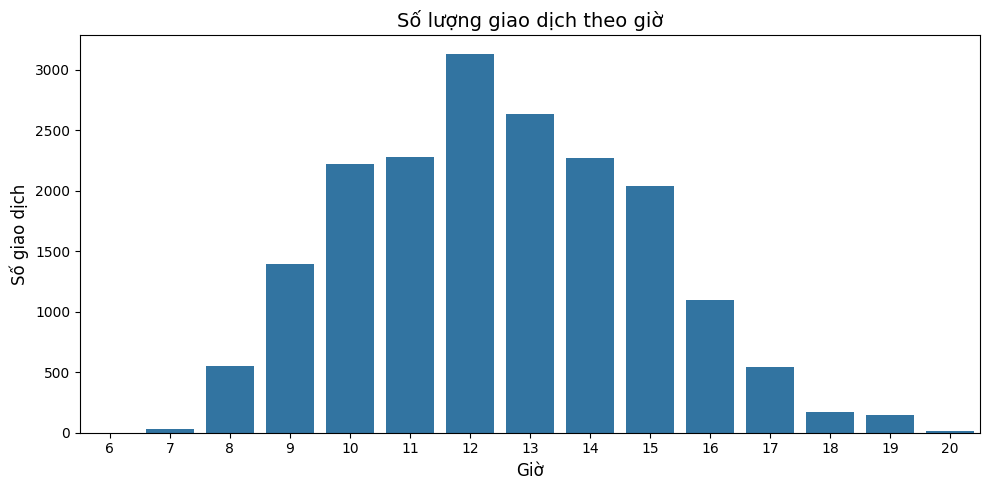

In [20]:
# Số lượng giao dịch theo giờ
hourly_transactions = df.groupby('Hour')['ï»¿InvoiceNo'].nunique().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Hour', y='ï»¿InvoiceNo', data=hourly_transactions)
plt.title('Số lượng giao dịch theo giờ', fontsize=14)
plt.xlabel('Giờ', fontsize=12)
plt.ylabel('Số giao dịch', fontsize=12)
plt.tight_layout()
plt.show()

## 8. Phân tích doanh thu theo quốc gia

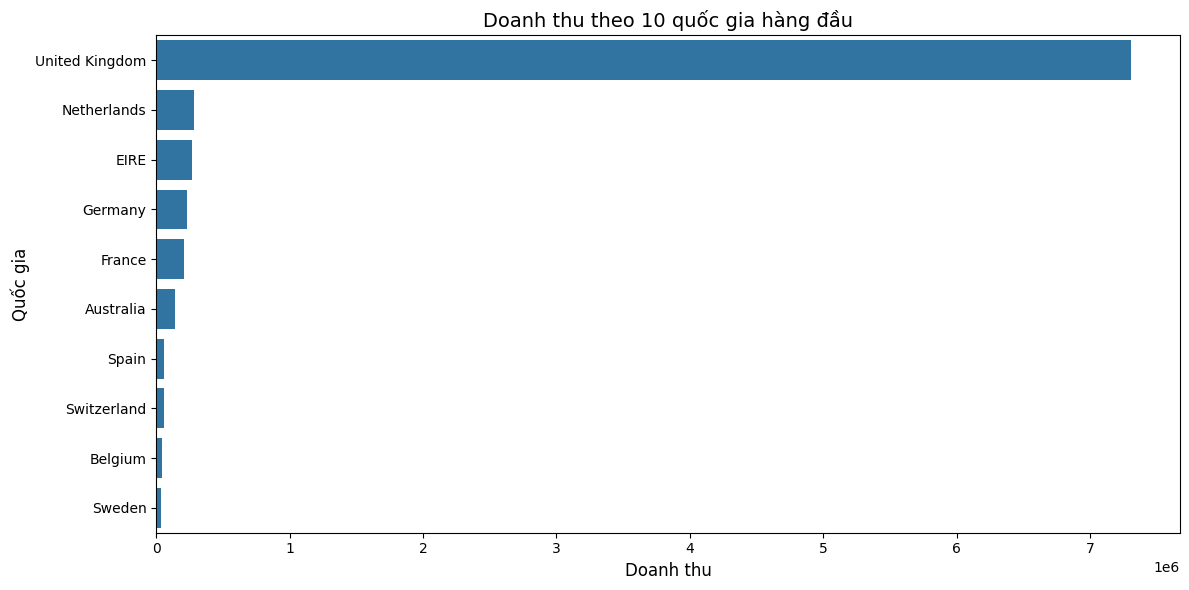

In [21]:
# Doanh thu theo quốc gia (10 quốc gia hàng đầu)
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPrice', y='Country', data=country_revenue)
plt.title('Doanh thu theo 10 quốc gia hàng đầu', fontsize=14)
plt.xlabel('Doanh thu', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.tight_layout()
plt.show()

## 9. Phân tích khách hàng

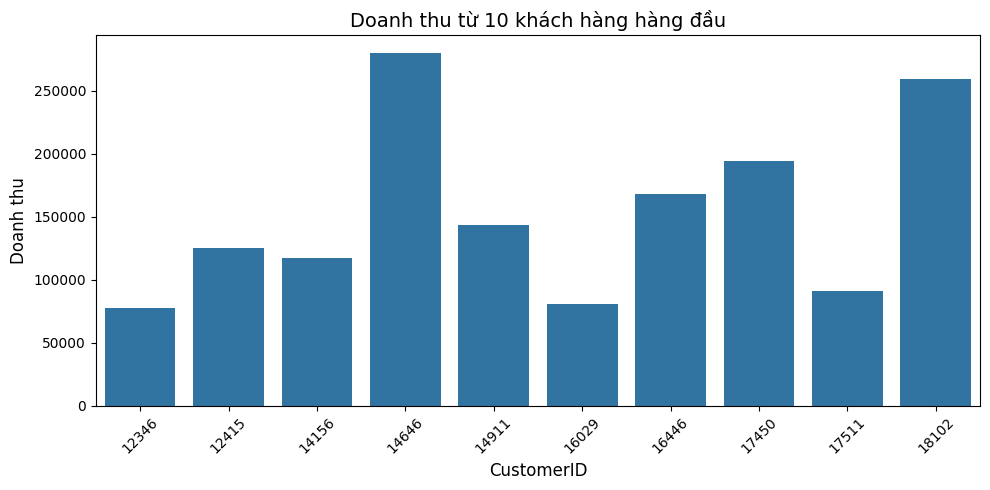

In [22]:
# Doanh thu từ 10 khách hàng hàng đầu
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='CustomerID', y='TotalPrice', data=top_customers)
plt.title('Doanh thu từ 10 khách hàng hàng đầu', fontsize=14)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Phân tích sản phẩm

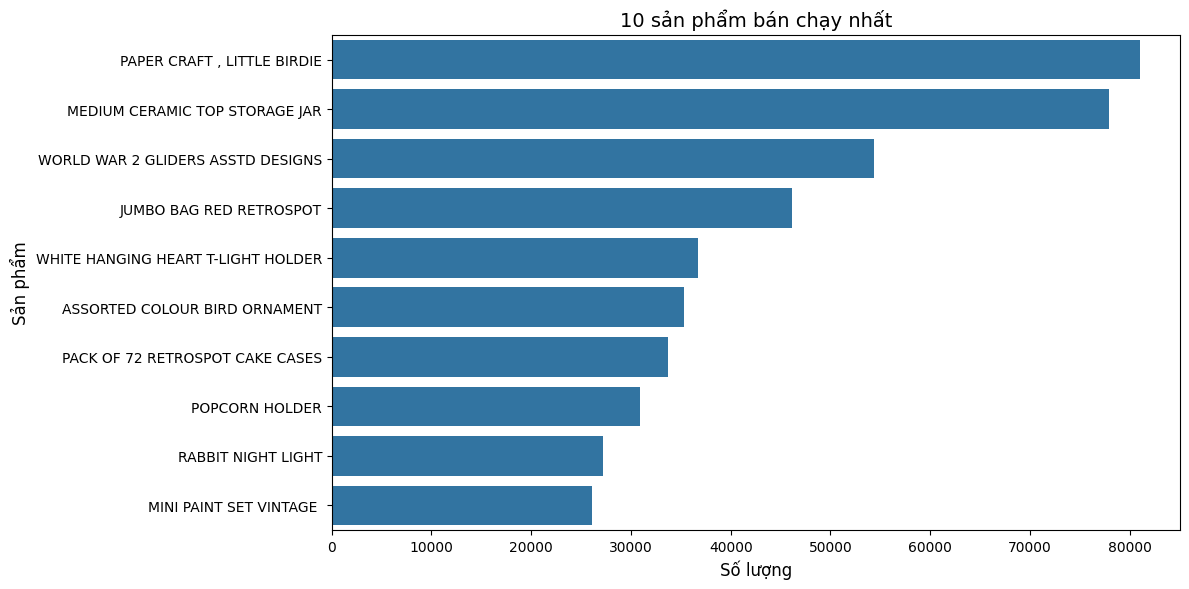

In [23]:
# 10 sản phẩm bán chạy nhất
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_products)
plt.title('10 sản phẩm bán chạy nhất', fontsize=14)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Sản phẩm', fontsize=12)
plt.tight_layout()
plt.show()